In [1]:
import pandas as pd
import numpy as np
fin = pd.read_csv('fundamental.csv')

In [2]:
fin

,GVKEY,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,invt,msa,ni,rect,revt,sale,seq,costat,mkvalt,sic
0,1004,20010531,2000.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,320.590,0.0,18.531,115.187,874.255,874.255,340.212,A,377.1180,5080
1,1004,20020531,2001.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,286.588,0.0,-58.939,77.528,638.721,638.721,310.235,A,364.5928,5080
2,1004,20030531,2002.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,259.954,0.0,-12.410,66.322,606.337,606.337,294.988,A,143.3295,5080
3,1004,20040531,2003.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,247.245,0.0,3.504,104.661,651.958,651.958,301.684,A,308.9071,5080
4,1004,20050531,2004.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,255.477,0.0,15.453,127.121,747.848,747.848,314.744,A,522.6794,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53585,270989,20071231,2007.0,INDL,C,D,STD,CAST,CHINACAST EDUCATION CORP,USD,...,0.276,0.0,8.035,5.283,28.187,28.187,110.224,I,186.6841,8200
53586,271841,20071231,2007.0,INDL,C,D,STD,GFA,GAFISA SA,USD,...,435.586,0.0,63.858,351.826,658.895,658.895,860.463,A,NaN,1520
53587,272699,20070630,2007.0,INDL,C,D,STD,ESNC,ENSYNC INC,USD,...,1.272,0.0,-9.630,0.230,0.584,0.584,15.918,A,53.1585,3690
53588,277918,20061231,2006.0,INDL,C,D,STD,ENVS,ENOVA SYSTEMS INC,USD,...,1.704,0.0,-4.836,0.358,1.666,1.666,11.964,A,45.7829,3714


In [2]:
fin1 = fin[fin.ni.notnull()]

In [3]:
fin2 = fin1.drop_duplicates(subset='GVKEY', keep='last', inplace=False)

In [4]:
fin2 = fin2.rename(columns={"at": "asset"})
fin2['stalt'].value_counts()

TL    23
Name: stalt, dtype: int64

In [5]:
fin2['rec_turnover'] = fin2.sale/fin2.rect
fin2['inv_turnover'] = fin2.cogs/fin2.invt
fin2['total_ast_turnover'] = fin2.revt/fin2.asset
fin2['quick_ratio'] = (fin2.ch+fin2.msa+fin2.rect)/fin2.dlc
fin2['cash_ratio'] = (fin2.ch+fin2.msa)/fin2.dlc
fin2['debt_equity'] = fin2.dltt/fin2.seq
fin2['debt_asset'] = fin2.dltt/fin2.asset
fin2['leverage'] = fin2.asset/fin2.seq
fin2['net_margin'] = fin2.ni/fin2.revt
fin2['book_market'] = fin2.bkvlps/fin2.mkvalt

In [6]:
fin2.columns

Index(['GVKEY', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'conm', 'curcd', 'stalt', 'asset', 'bkvlps', 'ch', 'cogs', 'dlc',
       'dltt', 'gp', 'invt', 'msa', 'ni', 'rect', 'revt', 'sale', 'seq',
       'costat', 'mkvalt', 'sic', 'rec_turnover', 'inv_turnover',
       'total_ast_turnover', 'quick_ratio', 'cash_ratio', 'debt_equity',
       'debt_asset', 'leverage', 'net_margin', 'book_market'],
      dtype='object')

In [7]:
import seaborn as sns
corr = fin2[['rec_turnover', 'inv_turnover', 'total_ast_turnover', 'quick_ratio',
       'cash_ratio', 'debt_equity', 'debt_asset', 'leverage',
       'net_margin', 'book_market']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Populating the interactive namespace from numpy and matplotlib


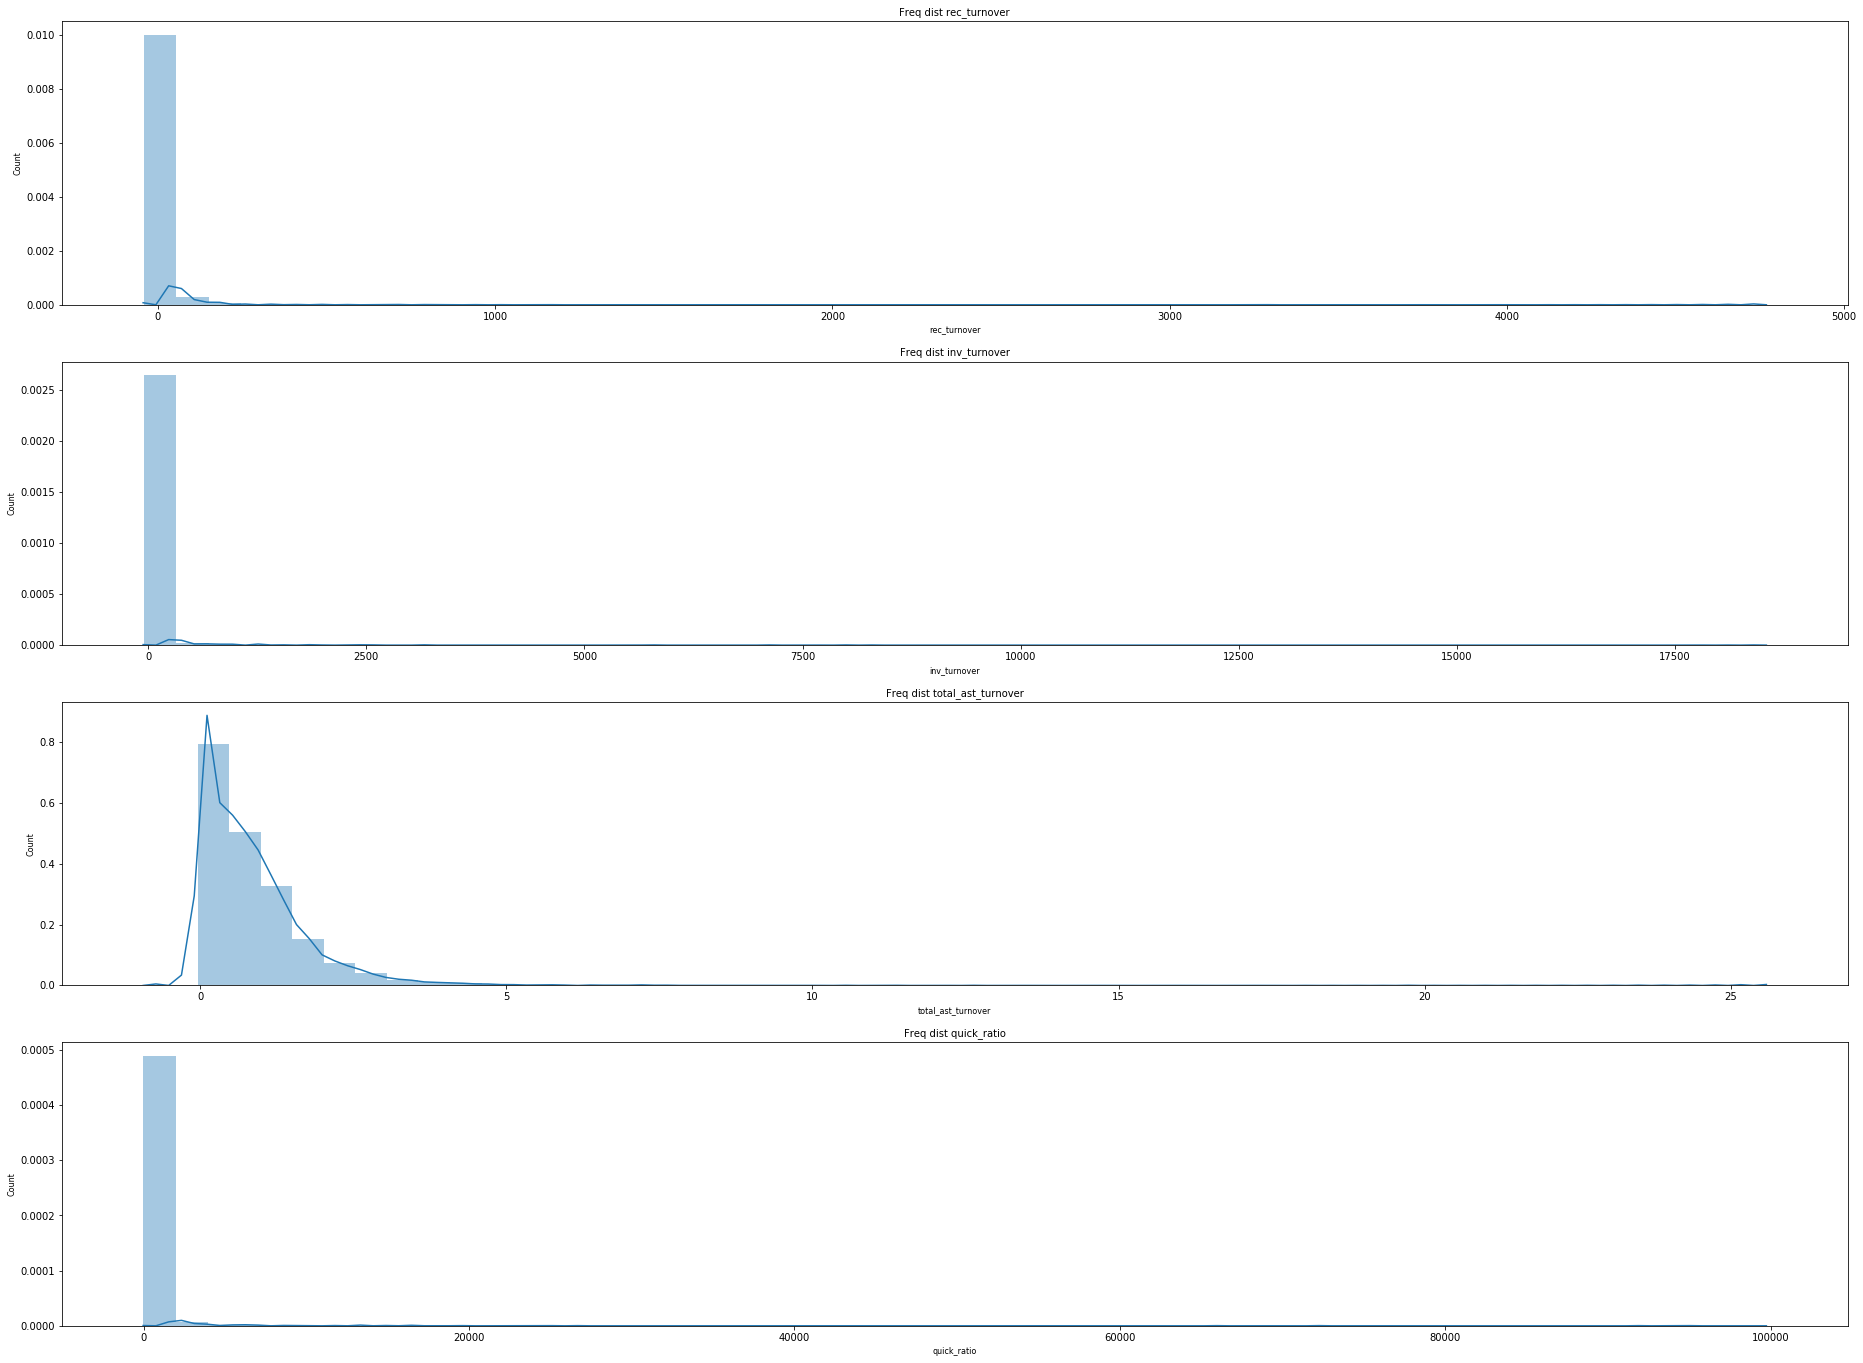

In [8]:
%pylab inline
col_names = ['rec_turnover', 'inv_turnover', 'total_ast_turnover', 'quick_ratio']

fig, ax = plt.subplots(len(col_names), figsize=(32,24))

for i, col_val in enumerate(col_names):

    sns.distplot(fin2[col_val].replace([np.inf, -np.inf], np.nan).dropna(), hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+ col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

Populating the interactive namespace from numpy and matplotlib


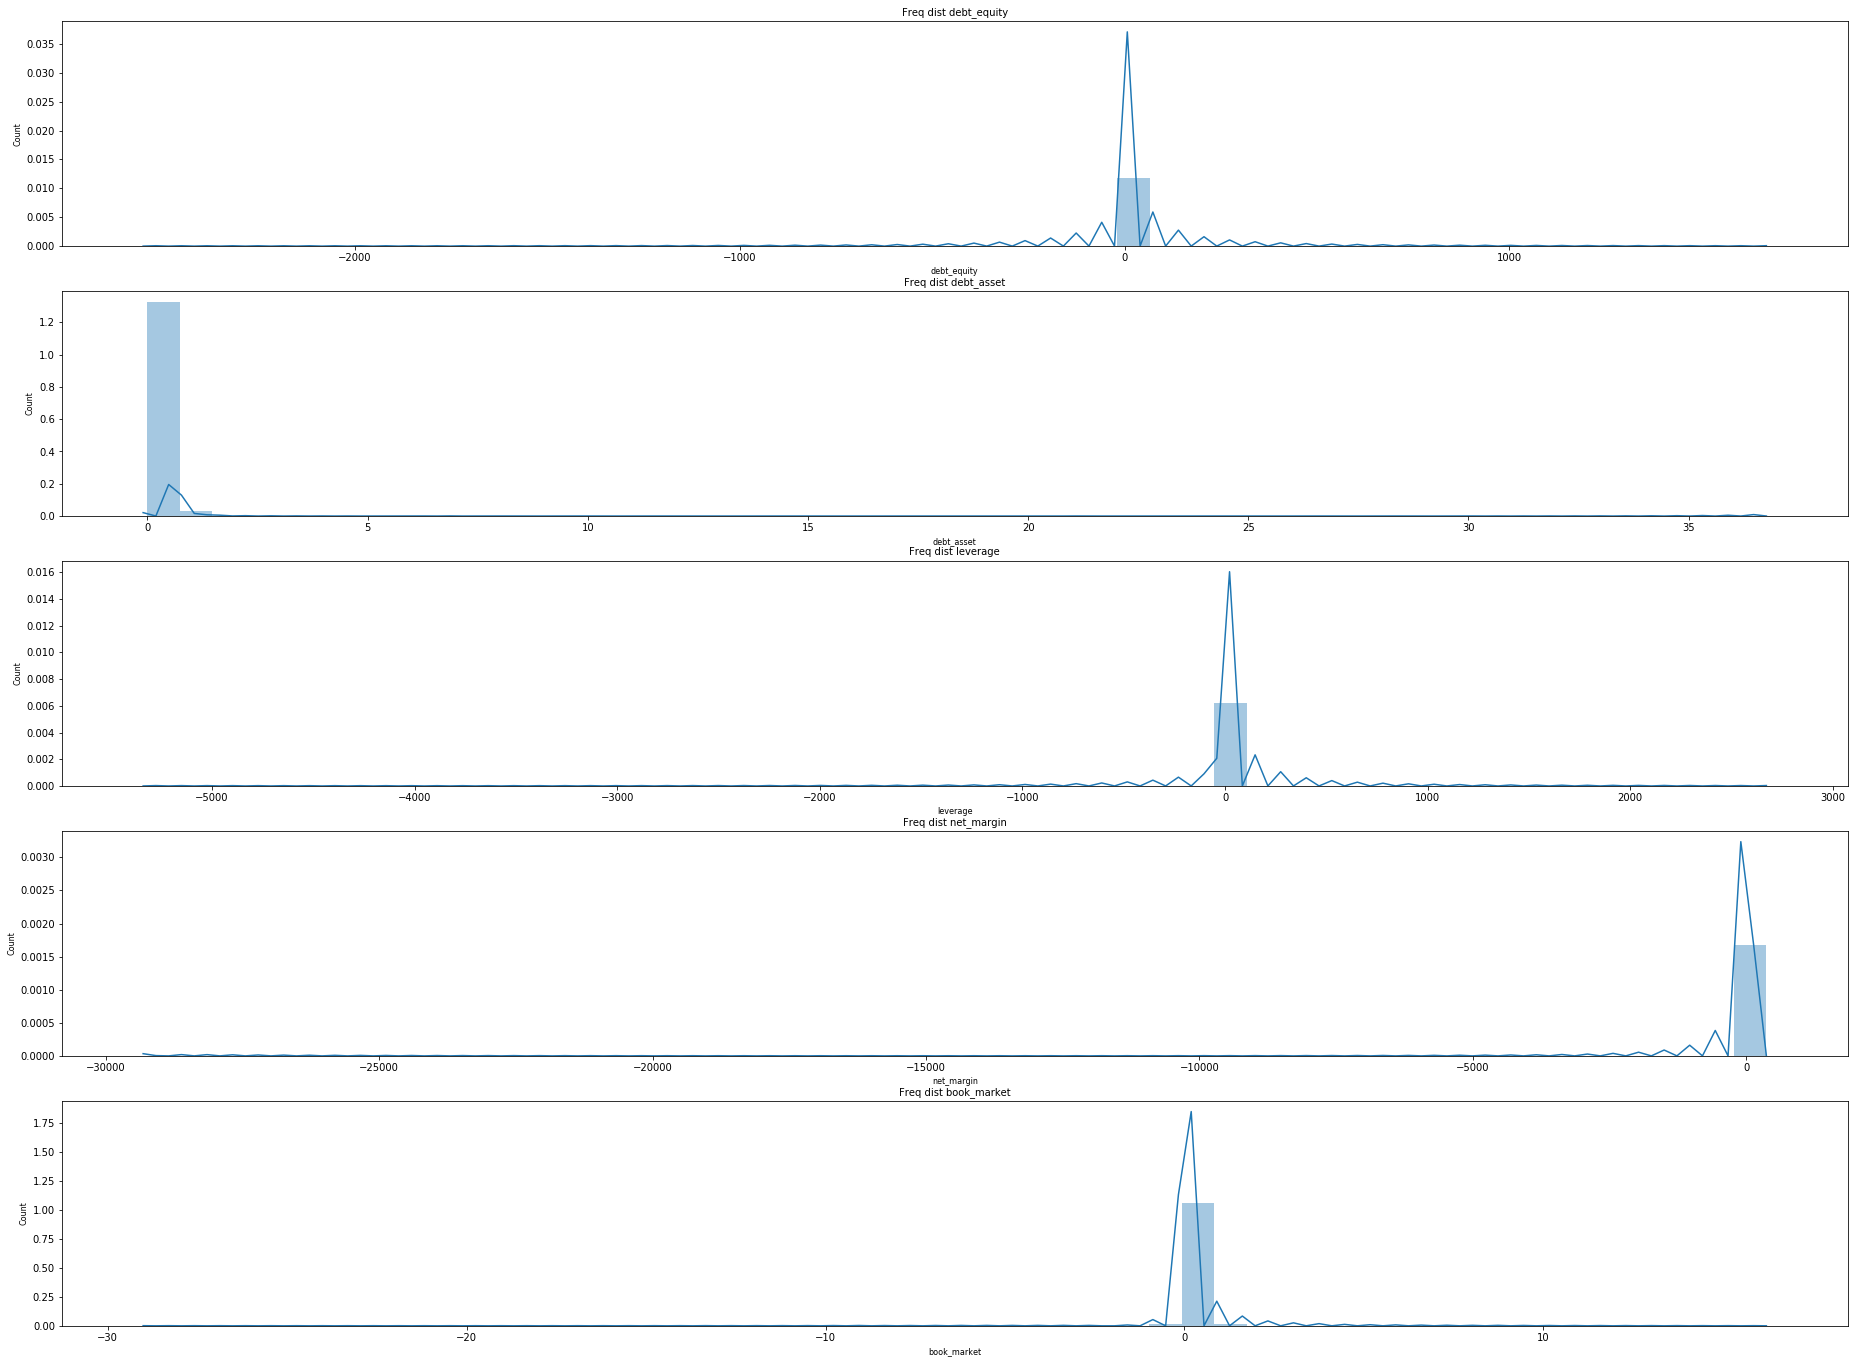

In [9]:
%pylab inline
col_names = ['debt_equity', 'debt_asset', 'leverage',
       'net_margin', 'book_market']

fig, ax = plt.subplots(len(col_names), figsize=(32,24))

for i, col_val in enumerate(col_names):

    sns.distplot(fin2[col_val].replace([np.inf, -np.inf], np.nan).dropna(), hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+ col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [10]:
fin2.stalt.replace(to_replace=np.nan, value=0, inplace=True)
fin2.stalt.replace(to_replace='TL', value=1, inplace=True)

In [11]:
fin2[['rec_turnover', 'inv_turnover', 'total_ast_turnover', 'quick_ratio',
       'cash_ratio', 'debt_equity', 'debt_asset', 'leverage',
       'net_margin', 'book_market']].replace([np.inf, -np.inf], np.nan).dropna(inplace=True)

In [12]:
fin3 = fin2.replace([np.inf, -np.inf], np.nan).dropna()
fin3

,GVKEY,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,rec_turnover,inv_turnover,total_ast_turnover,quick_ratio,cash_ratio,debt_equity,debt_asset,leverage,net_margin,book_market
7,1004,20080531,2007.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,6.840052,2.481348,1.016820,13.565626,4.760198,0.867858,0.372918,2.327208,0.054259,0.020192
15,1013,20071031,2007.0,INDL,C,D,STD,ADCT.1,ADC TELECOMMUNICATIONS INC,USD,...,5.910595,4.861927,0.749207,3.708375,2.593220,0.199087,0.113667,1.751489,0.080396,0.003896
23,1034,20071231,2007.0,INDL,C,D,STD,ALO.2,ALPHARMA INC -CL A,USD,...,5.546619,2.126101,0.560817,39.255711,27.449511,0.410325,0.232889,1.761890,-0.018799,0.018919
24,1036,20001231,2000.0,INDL,C,D,STD,UDI.,UNITED DOMINION INDUSTRIES,USD,...,6.291342,3.942471,1.017566,3.123112,0.663041,0.714130,0.283080,2.522716,0.023899,0.049408
36,1045,20071231,2007.0,INDL,C,D,STD,AAL,AMERICAN AIRLINES GROUP INC,USD,...,22.294060,29.993344,0.801372,1.116301,0.137274,3.798645,0.353260,10.753105,0.022013,0.003045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53544,266165,20070630,2007.0,INDL,C,D,STD,OSBK.2,OSAGE BANCSHARES INC,USD,...,0.086473,77.813953,0.062535,44.907000,0.546500,0.309519,0.089661,3.452095,0.122523,0.323420
53552,266216,20071231,2007.0,INDL,C,D,STD,ACFC,ATLANTIC COAST FINANCIAL CP,USD,...,0.088747,15.105241,0.067060,8.691325,0.059264,1.892969,0.182594,10.367080,0.017859,0.042087
53585,270989,20071231,2007.0,INDL,C,D,STD,CAST,CHINACAST EDUCATION CORP,USD,...,5.335415,40.057971,0.216432,4854.200000,3797.600000,0.000000,0.000000,1.181548,0.285060,0.021633
53587,272699,20070630,2007.0,INDL,C,D,STD,ESNC,ENSYNC INC,USD,...,2.539130,0.430818,0.024101,2.815063,2.779199,0.017967,0.011803,1.522239,-16.489726,0.029687


In [13]:
x = fin3[['rec_turnover', 'inv_turnover', 'total_ast_turnover', 'quick_ratio',
       'cash_ratio', 'debt_equity', 'debt_asset', 'leverage',
       'net_margin', 'book_market']]
y = fin3.stalt

In [14]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [15]:
## DecisionTree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier(criterion="entropy", random_state=1) 
result_train = model.fit(X_train, y_train)

# Predicting Train Set
y_pred_train = model.predict(X_train)
print("Accuracy on train set: %0.4f" % metrics.accuracy_score(y_train, y_pred_train))

# Predicting Test Set
y_pred_test = model.predict(X_test)
print("Accuracy on test set: %0.4f" % metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train set: 1.0000
Accuracy on test set: 0.9942


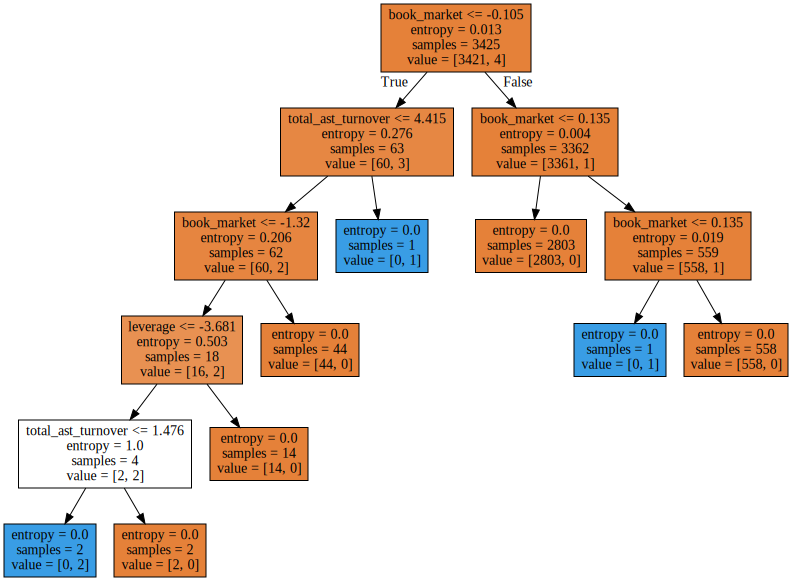

In [27]:
from sklearn import tree
import graphviz
graphviz.Source(tree.export_graphviz(model, out_file=None, feature_names=x.columns.values, filled=True))

Accuracy on test set: 0.9953


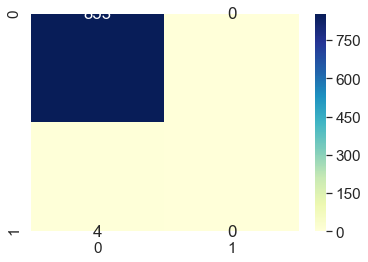

In [50]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
model = RandomForestClassifier(random_state = 1, n_estimators = 100, criterion = 'entropy')
model.fit(X_train, y_train)

# Predicting Test Set
y_pred_test = model.predict(X_test)

## Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (6,4))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")
print("Accuracy on test set: %0.4f" % metrics.accuracy_score(y_test, y_pred_test))

In [51]:
features_label = x.columns
importances = model.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(x.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) rec_turnover                   0.275566
 2) inv_turnover                   0.174974
 3) total_ast_turnover             0.110700
 4) quick_ratio                    0.102336
 5) cash_ratio                     0.079384
 6) debt_equity                    0.077372
 7) debt_asset                     0.075039
 8) leverage                       0.042663
 9) net_margin                     0.031410
10) book_market                    0.030556


<BarContainer object of 10 artists>

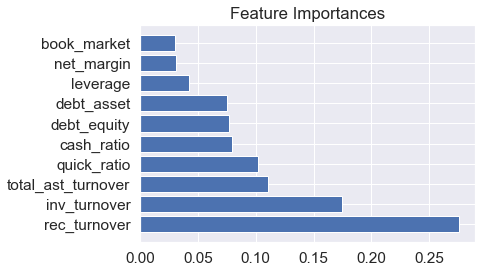

In [52]:
plt.title('Feature Importances')
plt.barh(features_label, importances[indices])